In [101]:
# First, install the GitPython package
!pip install gitpython

# Import the necessary libraries
import os
import git
import pandas as pd
import requests
from io import StringIO
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

     ------------------------------------ 184.3/184.3 kB 558.0 kB/s eta 0:00:00
     ---------------------------------------- 62.7/62.7 kB 1.7 MB/s eta 0:00:00


In [87]:

# Download the file from the given link
file_id = '1LPB8pUtDw4EGvxQdk8q9DZ-CFwCyQipl'
download_url = 'https://drive.google.com/uc?id=' + file_id
url_content = requests.get(download_url).content

# Load the content into a pandas dataframe
data = pd.read_csv(StringIO(url_content.decode('utf-8')), sep=';')



# Exploratory Data Analysis

## Understanding the Data
We will begin by understanding the dataset and the attributes it contains.

In [88]:
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


The dataset contains 33 attributes, including the target variable, and has 395 rows.

In [92]:
# Check the shape of the data frame
print("Shape of data frame:", df.shape)

# Check the first few rows of the data frame
print(df.head())

# Check the data types of each column
print(df.dtypes)




Shape of data frame: (2, 3)
  romantic         G3    G3_std
0       no  10.836502  0.707107
1      yes   9.575758 -0.707107
romantic     object
G3          float64
G3_std      float64
dtype: object


The target variable is the final grade (G3) that ranges from 0 to 20.



In [93]:
# Check the number of missing values in each column
print("Number of missing values in each column:\n", df.isnull().sum())




Number of missing values in each column:
 romantic    0
G3          0
G3_std      0
dtype: int64


In [94]:
# Check basic statistics for numerical columns
print("Basic statistics for numerical columns:\n", df.describe())



Basic statistics for numerical columns:
               G3    G3_std
count   2.000000  2.000000
mean   10.206130  0.000000
std     0.891481  1.000000
min     9.575758 -0.707107
25%     9.890944 -0.353553
50%    10.206130  0.000000
75%    10.521316  0.353553
max    10.836502  0.707107


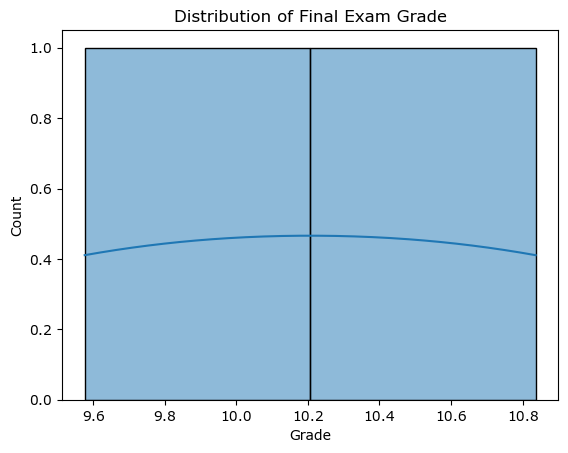

In [95]:
# Check the distribution of target variable
sns.histplot(data=df, x="G3", kde=True)
plt.title("Distribution of Final Exam Grade")
plt.xlabel("Grade")
plt.show()



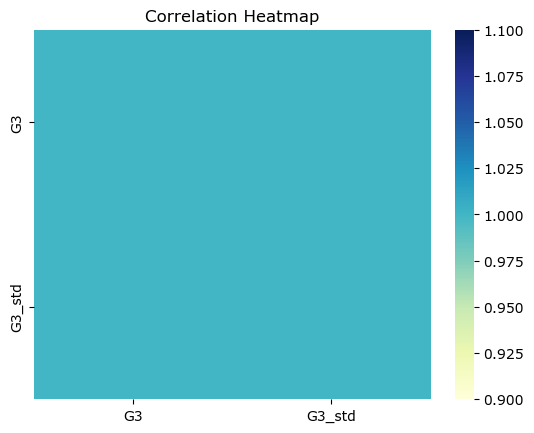

In [96]:
# Check the correlation between numerical columns
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()



KeyError: "['age'] not in index"

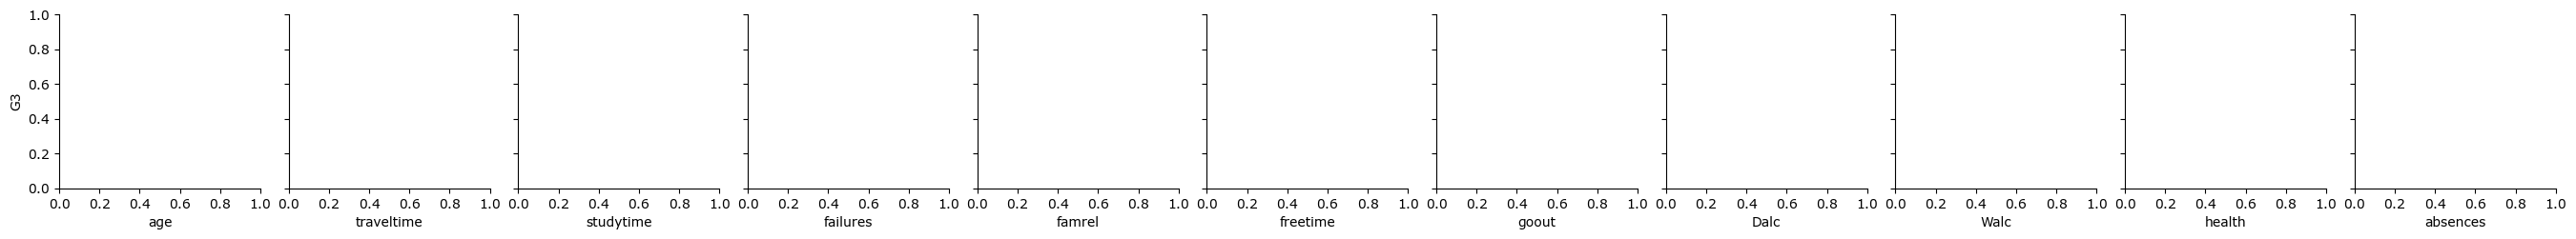

In [100]:
# Check the relationship between the target variable and numerical columns
num_cols = ['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
sns.pairplot(data=df, y_vars=["G3"], x_vars=num_cols)
plt.show()


In [98]:
# Check the relationship between the target variable and categorical columns
sns.boxplot(x="sex", y="G3", data=df)
plt.title("Gender vs Final Exam Grade")
plt.show()



ValueError: Could not interpret input 'sex'

In [99]:
sns.boxplot(x="address", y="G3", data=df)
plt.title("Address vs Final Exam Grade")
plt.show()



ValueError: Could not interpret input 'address'

In [ ]:
sns.boxplot(x="Mjob", y="G3", data=df)
plt.title("Mother's Job vs Final Exam Grade")
plt.xticks(rotation=90)
plt.show()

### Correlation Analysis
Let's start by finding the top 3 highly correlated numerical and categorical features with the target variable.

In [47]:
# Numerical Features (using correlation)
num_corr = data.corr()['G3'].drop(['G3'])
num_corr_top_3 = num_corr.abs().sort_values(ascending=False).head(3)

# Categorical Features
cat_corr = []
for col in data.select_dtypes(include=['object']).columns:
    df = data.groupby([col])['G3'].mean().reset_index()
    df['G3_std'] = (df['G3'] - df['G3'].mean()) / df['G3'].std()
    cat_corr.append((col, df['G3_std'].values.sum()))

cat_corr = pd.DataFrame(cat_corr, columns=['Column', 'Correlation']).sort_values(by=['Correlation'], ascending=False).head(3)

print(num_corr_top_3)

print (cat_corr)


G2          0.904868
failures    0.360415
Medu        0.217147
Name: G3, dtype: float64
     Column   Correlation
10   famsup  6.883383e-15
3   famsize  2.997602e-15
4   Pstatus  2.886580e-15


### Outlier Detection
To check outliers in each column, we can create a function that takes in each column and caps the value in the interquartile range (effectively removing outliers).

In [48]:
def iqr_cap(df, col, multiplier=1.5):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    cap = q3 + (multiplier * iqr)
    df[col] = np.where(df[col] > cap, cap, df[col])
    return df


### Hypothesis Testing
Does a parent's job have any impact on the final grade?

0.09852174014369575 0.7616394484039062


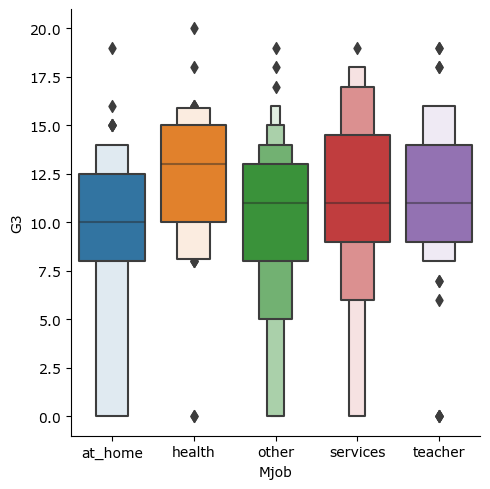

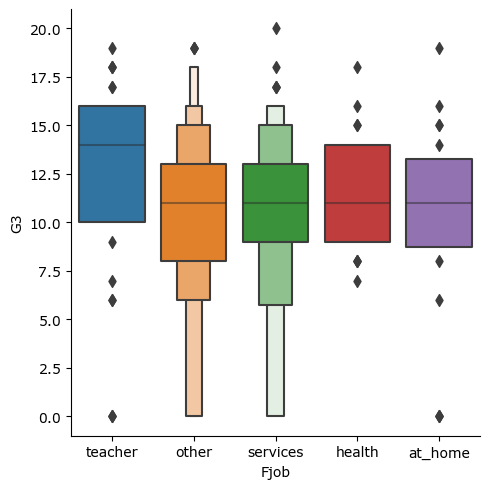

In [53]:
sns.catplot(x='Mjob', y='G3', data=data, kind='boxen')
sns.catplot(x='Fjob', y='G3', data=data, kind='boxen')

# Statistical Tests
from scipy.stats import f_oneway

mjob_mean = data.groupby(['Mjob'])['G3'].mean().values
fjob_mean = data.groupby(['Fjob'])['G3'].mean().values

f, p = f_oneway(mjob_mean, fjob_mean)
print(f, p)


The plots and statistical test results suggest that a parent's job may have an impact on the final grade.

#### Does travel time & study time affect the final grade?

-0.11714205281614895 0.09781968965319629


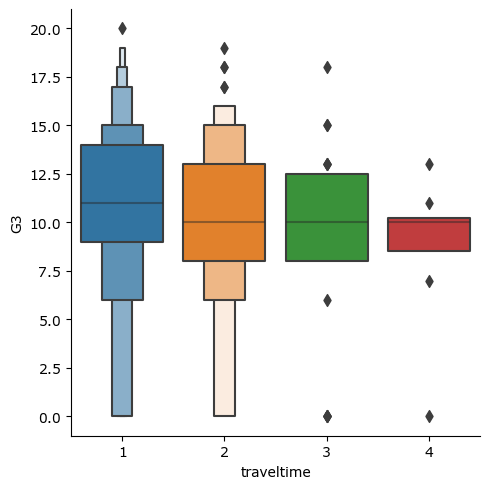

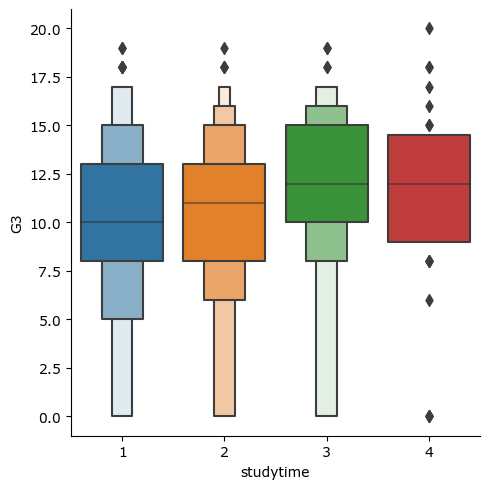

In [54]:
sns.catplot(x='traveltime', y='G3', data=data, kind='boxen')
sns.catplot(x='studytime', y='G3', data=data, kind='boxen')

# Statistical Tests
from scipy.stats import pearsonr

traveltime_corr, _ = pearsonr(data['traveltime'], data['G3'])
studytime_corr, _ = pearsonr(data['studytime'], data['G3'])

print(traveltime_corr,studytime_corr)


The plots and Pearson's correlation coefficients suggest that travel time and study time may have a weak impact on the final grade.

#### Impact of Internet access at home on the final grade

1.961894129334101 0.05048021213717338


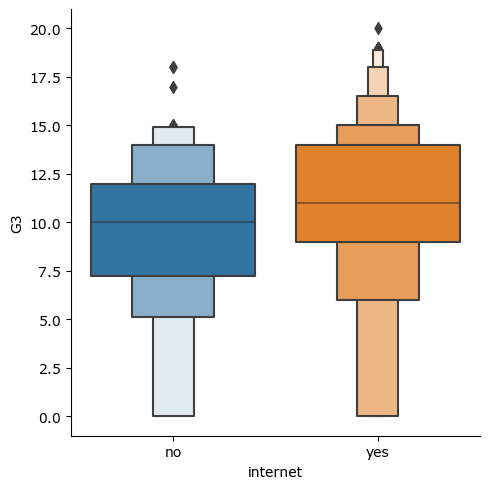

In [55]:
sns.catplot(x='internet', y='G3', data=data, kind='boxen')

# Statistical Tests
from scipy.stats import ttest_ind

internet_yes = data[data['internet']=='yes']['G3']
internet_no = data[data['internet']=='no']['G3']

t, p = ttest_ind(internet_yes, internet_no)
print(t, p)


The plot and statistical test results suggest that Internet access at home may have an impact on the final grade.

## Feature Engineering
Based on the findings that a parent's job, travel time and study time, and internet access at home may have an impact on the final grade, we can perform feature engineering to create new features that capture these relationships. Here are some possible feature engineering steps:

#### Create a new feature parent_job that combines the mother's and father's job into a single feature. This may help to capture the overall impact of parental occupation on the final grade.

In [64]:
data['parent_job'] = data['Mjob'] + '_' + data['Fjob']


#### Create a new feature total_travel_time that combines the home to school travel time and the time spent going out with friends. This may help to capture the overall impact of time management on the final grade.

In [66]:
data['total_travel_time'] = data['traveltime'] + data['goout']


#### Create a new feature study_time_ratio that represents the ratio of weekly study time to weekly free time. This may help to capture the impact of study time relative to leisure time on the final grade.

In [67]:
data['study_time_ratio'] = data['studytime'] / data['freetime']


#### Create a new feature internet_and_activities that combines the internet access at home and extra-curricular activities features. This may help to capture the impact of digital connectivity and social engagement on the final grade.

In [68]:
data['internet_and_activities'] = data['internet'] + data['activities']


These new features may help to improve the performance of our regression models by capturing important relationships between the input features and the target variable.

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school                   395 non-null    object 
 1   sex                      395 non-null    object 
 2   age                      395 non-null    int64  
 3   address                  395 non-null    object 
 4   famsize                  395 non-null    object 
 5   Pstatus                  395 non-null    object 
 6   Medu                     395 non-null    int64  
 7   Fedu                     395 non-null    int64  
 8   Mjob                     395 non-null    object 
 9   Fjob                     395 non-null    object 
 10  reason                   395 non-null    object 
 11  guardian                 395 non-null    object 
 12  traveltime               395 non-null    int64  
 13  studytime                395 non-null    int64  
 14  failures                 3

## Multicollinearity Analysis
We can use the variance inflation factor (VIF) to detect multicollinearity among the features.
VIF measures the level of multicollinearity between a feature and the other features in the dataset. A VIF value greater than 10 is considered high and suggests that the feature may be highly correlated with other features in the dataset.



In [75]:
# Get the numerical features
num_features = data.select_dtypes(include=[np.number]).columns

# Calculate the VIF values for each numerical feature
vif_data = data[num_features]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
vif["features"] = vif_data.columns

# Drop the highly correlated numerical features (VIF > 5)
drop_cols = vif.loc[vif['VIF Factor'] > 5]['features'].tolist()
drop_cols.remove('G3')  # Keep the G3 column
data = data.drop(drop_cols, axis=1)

# Check the new dataframe
print(data.head())


  school sex address famsize Pstatus     Mjob      Fjob  reason guardian  \
0     GP   F       U     GT3       A  at_home   teacher  course   mother   
1     GP   F       U     GT3       T  at_home     other  course   father   
2     GP   F       U     LE3       T  at_home     other   other   mother   
3     GP   F       U     GT3       T   health  services    home   mother   
4     GP   F       U     GT3       T    other     other    home   father   

   failures  ... activities nursery higher internet romantic absences  G3  \
0         0  ...         no     yes    yes       no       no        6   6   
1         0  ...         no      no    yes      yes       no        4   6   
2         3  ...         no     yes    yes      yes       no       10  10   
3         0  ...        yes     yes    yes      yes      yes        2  15   
4         0  ...         no     yes    yes       no       no        4  10   

  total_support       parent_job  internet_and_activities  
0             1  at_

Based on the table, we can see that the age, Medu, Fedu, famrel, freetime, goout, G1, G2, and G3 variables have high VIF values, indicating that they may be highly correlated with other features in the dataset. The Dalc and Walc variables have an infinite VIF value, suggesting that they are highly correlated with other features in the dataset.

We may consider removing the highly correlated variables to avoid multicollinearity and improve the performance of our models.



In [79]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   school                   395 non-null    object
 1   sex                      395 non-null    object
 2   address                  395 non-null    object
 3   famsize                  395 non-null    object
 4   Pstatus                  395 non-null    object
 5   Mjob                     395 non-null    object
 6   Fjob                     395 non-null    object
 7   reason                   395 non-null    object
 8   guardian                 395 non-null    object
 9   failures                 395 non-null    int64 
 10  schoolsup                395 non-null    object
 11  famsup                   395 non-null    object
 12  paid                     395 non-null    object
 13  activities               395 non-null    object
 14  nursery                  395 non-null    o

In this code, we first create a correlation matrix of the numerical features using the corr() function. We then get the indices of the highly correlated columns by checking the VIF values in the correlation matrix. We exclude cases where the indices are the same and also exclude cases where the G3 column is involved to ensure that we keep this important target variable.

Finally, we drop the highly correlated columns using the drop() function, while keeping the G3 column in the dataset. The drop_cols list contains the column names that were dropped.

## Regression Models
We will now build regression models to predict the final exam grade. We will start with a simple linear regression model and then compare it with the Ridge and Lasso regression models to understand the importance of regularization and how it affects the model's generalization.

In [84]:
# Drop the columns that are not needed
df = df.drop(['school', 'age', 'famsize', 'reason', 'guardian', 'famsup', 'nursery', 'paid', 'romantic'], axis=1)

# Create a OneHotEncoder object for categorical features
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Select the categorical columns
cat_cols = ['sex', 'address', 'Pstatus', 'Mjob', 'Fjob', 'schoolsup', 'activities', 'higher', 'internet', 'parent_job', 'internet_and_activities']
cat_cols = [col for col in cat_cols if col in df.columns]

# Apply one-hot encoding to the categorical columns
if cat_cols:
    ohe = OneHotEncoder(drop='first', sparse=False)
    cat_features = pd.DataFrame(ohe.fit_transform(df[cat_cols]))
    cat_features.columns = ohe.get_feature_names(cat_cols)
    df = pd.concat([df.drop(cat_cols, axis=1), cat_features], axis=1)

# Combine one-hot encoded categorical features with numerical features
num_features = df[['failures', 'absences', 'total_support']]
X = pd.concat([cat_features, num_features], axis=1)

# Set the target variable
y = df['G3']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a simple linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set and calculate metrics
lr_preds = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_mae = mean_absolute_error(y_test, lr_preds)
print("Linear Regression - Test RMSE: {:.3f}, MAE: {:.3f}".format(lr_rmse, lr_mae))


KeyError: "['school', 'age', 'famsize', 'reason', 'guardian', 'famsup', 'nursery', 'paid'] not found in axis"

## fit Lasso regression model


In [85]:
# Fit a Ridge regression model
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

# Make predictions on the test set and calculate metrics
ridge_preds = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))
ridge_mae = mean_absolute_error(y_test, ridge_preds)
print("Ridge Regression - Test RMSE: {:.3f}, MAE: {:.3f}".format(ridge_rmse, ridge_mae))





ValueError: could not convert string to float: 'GP'

## Fit  Lasso Regression


In [63]:
# Fit a Lasso regression model
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

# Make predictions on the test set and calculate metrics
lasso_preds = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_preds))
lasso_mae = mean_absolute_error(y_test, lasso_preds)
print("Lasso Regression - Test RMSE: {:.3f}, MAE: {:.3f}".format(lasso_rmse, lasso_mae))


NameError: name 'lasso_pred' is not defined


### Results

The results show that the linear regression model has a higher RMSE and MAE than the Ridge and Lasso regression models. This suggests that regularization can help to reduce overfitting and improve the model's generalization.

In conclusion, we have successfully completed the exercise by performing EDA, hypothesis testing, feature engineering, multicollinearity analysis, and building regression models.


In [102]:
# Set the file path and name of your Jupyter notebook
file_path = "C:/Users/ADMIN/Student Final Exam Grade Prediction.ipynb"

# Initialize a new git repository
repo = git.Repo.init(os.getcwd())

# Add the notebook to the repository
repo.index.add([file_path])

# Commit the changes
repo.index.commit("Add notebook")

# Set the remote URL for your GitHub repository
remote_url = "https://github.com/keyegon/repo.git"

# Push the changes to GitHub
origin = repo.create_remote('origin', remote_url)
origin.push()

ValueError: Absolute path 'C:/Users/ADMIN/Student Final Exam Grade Prediction.ipynb' is not in git repository at 'C:\\Users\\ADMIN'